# Formation RNAseq CEA - juin 2024

*Enseignantes: Sandrine Caburet et Claire Vandiedonck.*

Session IFB : 5 CPU + 10 GB de RAM

# Part 00b: Découverte des commandes de base en bash (Unix) : 

>- pwd, ls
>- du, df
>- tree, cd
>- mkdir, touch, echo, nano
>- cp, mv
>- rm, rmdir
>- cat, head, tail
>- wc, sort, cut, grep, sed
>- md5sum

## Plan du notebook

- 0 - Avant d'aller plus loin
- 1 - Introduction
- 2 - Système de fichiers
- 3 - Manipulation de fichiers et répertoires
- 4 - Lire, explorer un fichier et écrire dedans
- 5 - Sommes de contrôle
- 6 - Un peu d'automatisation : variables et boucles


---
---

## 0 - Avant d'aller plus loin
---

<div class="alert alert-block alert-warning"> ⚠️
    <u>Ce notebook doit être dans le dossier correspondant à votre <b>home</b></u> dans laquelle vous arrivez en cliquant dans l'arboresence, en haut à gauche du navigateur de l'interface Jupyter lab:
    <ul>
    <li>vous cliquez d'abord sur <code>projects</code><il>
    <li>puis sur <code>shared</code> au dessus de <code>projects</code><il>
    <li>puis sur <code>home</code> dans <code>projects</code><il>
    <li>puis sur le dossier dans <code>home</code> qui correspond à votre <code>login</code><il></ul>
   
Si ce n'est pas le cas, supprimez-le du dossier où vous l'avez mis et mettez-le de nouveau directement dans le bon dossier depuis votre ordinateur.</div>
        
Nous vous expliquerons un peu plus loin ce qu'est votre `home` et l'`arboresence` unix.


<div class="alert alert-block alert-danger"> 🚨 <b>Attention:</b> 
Ne travaillez pas directement sur ce notebook pour ne pas le perdre. Dupliquez-le et renommez-le par exemple en ajoutant vos initiales et travaillez sur cette nouvelle copie.<br>
    N'oubliez pas de sauvegarder régulièrement votre notebook: <kbd>Ctrl</kbd> + <kbd>S</kbd>. ou en cliquant sur l'icone 💾 en haut à gauche de votre notebook ou dans le Menu du JupyterLab "File puis "Save Notebook"!
</div>

<div class="alert alert-block alert-info"> 
   
💡 <b>Rappel :</b> Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
Les astuces pour utiliser les cellules des notebooks sont rappelées tout en bas dans un cadre bleu ⏬.
</div>

=> ***A propos de ce notebook jupyter***

Ce notebook jupyter notebook est en **bash**, ce qui signifie que les commandes que vous entrerez dans les cellules de `Code` seront directement lues en Bash par le serveur. <br> Vous pourriez executez ces mêmes commandes dans un  `Terminal` (l'effroyable fenêtre noire :😰). 

  
Dans ce notebook, <u>**vous aurez 3 types de cellule de code :**</u>
    
- des cellules de code déjà renseigné sans questions (texte en noir au dessus) : il s'agit de commandes avec les explications fournies avant/après en mode "tutoriel"
- <span style="color:green">des cellules avec le code déjà renseigné avec des questions (texte en vert au-dessus):</span> vous devrez comprendre les commandes correspondantes.
- <span style="color:blue">des cellules sans code avec des instructions en bleu au dessus :</span> vous devrez trouver et écrire le code adéquat


Dans ce TP, vous lancerez **chaque cellule l'une après l'autre dans l'ordre**. Si vous revenez en arrière et rééxécuter une cellule, veillez à relancer les suivantes. Les cellules sont numérotées dans leur ordre d'exécution.

---
---

## 1. Introduction : un aperçu du shell Unix
---

### 1.1. Shell, bash et terminal
---

Un ***shell*** est un programme qui attend un ordre de la part de l'utilisateur, exécute cet ordre, affiche le résultat puis attend à nouveau un ordre. En anglais on parle de *REPL* pour *Read Execute Print Loop*. Il existe plusieurs *shells* : *Bash*, *csh*, *zsh*... Ici on ne parlera que du *shell* *Bash* qui est le plus utilisé. Cela dit, toutes les commandes présentées ici sont communes à tous les *shells* Unix.

Lorsqu'on donne des ordres à un *shell*, on utilise ni menu, ni bouton, ni case à cocher. Tous les ordres sont **écrits** au *shell*.

Le *shell* fonctionne sur un ordinateur, qui n'a aucune capacité d'abstraction ni d'intuition. Pour que les ordres donnés au *shell* soient compris et exécutés, il faut respecter des règles bien précises :

1. Dans Unix, tous les caractères sont *sensibles à la casse*, c'est-à-dire l'utilisation des majuscules et des minuscules. Par exemple la commande `ls` existe mais pas `LS` ou `Ls` ni `lS`.
2. N'utilisez pas d'accents et évitez les caractères spéciaux. 
3. Il faut bien comprendre que le caractère espace est utilisé pour séparer l'instruction des options et des arguments et que par conséquent **le caractère `espace` ne doit plus être utilisé** dans les noms de fichiers ou de répertoires.
4. Dans les cellules de `Code` du notebook Jupyter, les lignes débutant par un `#` sont des commentaires qui ne seront pas interprétées comme des commandes. Elles ont été ajoutées pour vous aider. Vous pouvez ajouter vos propres commentaires ou notes dans ce document, soit dans des cellules de `Code` en utilisant `#`, soit dans des cellules de type `Markdown` que vous pouvez ajouter en cliquant sur le <kbd>➕</kbd> dans le menu en haut à gauche de ce notebook. 

***Bash*** est un interpréteur de lignes de commande (*shell*) utilisé sur des systèmes Unix / Linux. C'est un des *shells* les plus utilisés sous Linux.

Enfin, un ***terminal*** (ou une console) est un logiciel graphique qui lance un *shell*. C'est ce dernier (le *shell*) qui va exécuter vos ordres. Dans un notebook, les ordres sont directement mis dans les cellules de code.


<div class="alert alert-block alert-info"> 💡 <b>Info :</b> <br>Si vous souhaitez mieux comprendre la différence entre <i>shell</i> et <i>terminal</i>, jetez un oeil à cette <a href="https://www.youtube.com/watch?v=U2b-MYcSCLc">vidéo</a>.</div>

--
### 1.2. Invite de commande
---

Lorsque vous lancez un *shell*, l'invite de commande, c'est-à-dire la zone à gauche du curseur qui clignote, ressemble à quelque chose du type :

>claire@7920-Tower:~$

ou bien encore

>[cvandiedonck@cpu-node-15 ~]$

ou bien encore

>[cvandiedonck@cpu-node-15 cvandiedonck]$

voire

>toto $

<div class="alert alert-block alert-info"> <b> 💡 Info :</b> <br>
Dans de nombreuses ressources en ligne, on vous indique des commandes en mettant l'invite de commande, généralement représentée par un simple "\$" en tout début de ligne. Par exemple, "\$ pwd". Dans ce cas, pour reproduire les commandes présentées, il ne faut pas taper ce caractère "\$" en début de ligne. Cela signifie : tapez l'instruction <code>pwd</code> dans le <i>shell</i> (sans le <code>$</code>), puis validez cette commande en pressant la touche <kbd>Entrée</kbd>.<br>Dans une cellule de Jupyter notebook, le prompt n'apparaît pas. Vous savez quel langage vous utilisez <i>(bash ici)</i> en regardant le nom du <b><i>kernel</i></b> (<i>noyau</i>) utilisé dans le coin en haut à droite du notebook.</div>

---
---

## 2. Système de fichiers 
---

Le système de fichiers (*file system*) d'un système d'exploitation (*operating system* ou *OS*) permet l'organisation hiérarchique des fichiers (*file*) et des répertoires/dossiers (*directory*). Un ensemble de commandes Unix permettent de se déplacer dans cette arborescence, de créer/renommer/déplacer/effacer des fichiers ou des répertoires. 


### 2.1. Répertoire de travail/répertoire courant
---

Sous Unix, les répertoires et les fichiers sont organisés sous forme d'une structure en arbre. On parle d'arborescence (voir l'[illustration](https://swcarpentry.github.io/shell-novice/fig/home-directories.svg) de [Software Carpentry](https://swcarpentry.github.io/shell-novice/02-filedir.html)).

Le répertoire dont dépendent tous les autres est le `/` qu'on appelle la « racine » (*root* en anglais), les différents sous-répertoires sont séparés les uns des autres par le caractère `/` (le même caractère que la racine).

Pour se déplacer dans l'arborescence, il faut d'abord savoir à quel niveau on se trouve à un instant donné, c'est-à-dire **connaitre le répertoire de travail** (*working directory* ou *wd*) encore appelé **répertoire courant**. 

<span style="color:blue">- Exécutez la commande `pwd` qui affiche le répertoire de travail (<i>print working directory</i>):</span>

In [1]:
# cell 1
pwd

/shared/home/cvandiedonck


<div class="alert alert-block alert-success">
Vous devriez obtenir ceci: <code>/shared/ifbstor1/home/votre_login/</code> ou <code>/shared/home/votre_login/</code></div>

Remarquez que le chemin affiché contient votre `Username`, c'est à dire que le dossier correspondant à votre `home` a été créé avec le même nom que votre login.

Dans l'exemple de `/shared/home/cvandiedonck` :

- on se trouve dans le répertoire `cvandiedonck`,
- qui est lui-même un sous-répertoire du répertoire `home`,
- qui est lui-même un sous-répertoire du répertoire `shared`,
- qui est lui-même un sous-répertoire du répertoire `/` (la racine du système de fichiers).

`/shared/home/cvandiedonck` est aussi appelé un **chemin** car il indique la succession des répertoires à suivre pour arriver jusqu'au dernier répertoire `cvandiedonck`. D'abord la racine  `/`, puis `shared`, puis `home`, et enfin `cvandiedonck`.


Il s'agit du **chemin absolu** (*absolute path*) de votre actuel répertoire de travail. Remarquez qu' <span style="color:red"><b>un chemin absolu commence toujours par un "slash" `/`</b></span> , qui désigne la racine (*root*) de l'arborescence.


Il existe aussi des **chemins relatifs** (donc qui ne débutent pas par `/`) que l'on verra plus tard.


<div class="alert alert-block alert-danger"> 🚨 <b>Attention:</b> 
Ne confondez pas le <code>/</code> qui, lorsqu'il est placé au tout au début d'un chemin, désigne la racine, du même caractère <code>/</code> qui sépare deux répertoires successifs.
</div>


<div class="alert alert-block alert-info"> <b> 💡 Info :</b> <br>
<b>Le <code>home</code> est votre répertoire principal</b> sur l'IFB (et tout autre serveur). Le symbole <code>~</code> (touches <kbd>AltGr</kbd>+<kbd>2</kbd> sur Azerty PC ou <kbd>Alt</kbd>+<kbd>n</kbd> sur un Azerty Mac) est un raccourci de votre home. Vous pouvez utiliser ce symbole plutôt que le chemin absolu/relatif de votre home.</div>



--
### 2.2. Contenu d'un répertoire
---

#### 2.2.A. Lister le contenu du répertoire de travail
---


La commande `ls` (pour *list*) affiche le contenu d'un répertoire :

<span style="color:blue">- Listez (<i>list</i>) les fichiers/répertoires du répertoire courant à l'aide de la commande `ls`:</span>

In [2]:
# cell 2
ls

Pipe_00a-bash-bienvenue-sur-IFB.ipynb	 intro-to-jupyter-notebooks_en.ipynb
Pipe_00b-bash_intro-to-bash-Copy1.ipynb  mnt
Pipe_00b-bash_intro-to-bash.ipynb	 ondemand
R					 to_hide
intro-to-bash_en.ipynb


Comparez le résultat à ce qui est affiché dans la barre latérale gauche de l'interface. Ce doit être identique.

L'affichage se fait sous forme d'une série de valeurs sur une même ligne ou plusieurs lignes.


On peut modifier le comportement par défaut d'une commande avec une (ou plusieurs) option(s). Cette option est séparée de la commande `ls` par un ou plusieurs espaces.

Par exemple avec `-r` :

In [3]:
# cell 3
ls -r

to_hide				     R
ondemand			     Pipe_00b-bash_intro-to-bash.ipynb
mnt				     Pipe_00b-bash_intro-to-bash-Copy1.ipynb
intro-to-jupyter-notebooks_en.ipynb  Pipe_00a-bash-bienvenue-sur-IFB.ipynb
intro-to-bash_en.ipynb


Cette commane a listé les fichiers dans l'ordre inverse. L'option `-r` signifie reverse.


<div class="alert alert-block alert-warning"> 📝 Retenez qu’il faut au moins un espace entre une commande et son option.</div>

<div class="alert alert-block alert-info"> <b> 💡 Info :</b> <br>
Pour trouver de l'aide sur les commandes, on peut utiliser la commande <code>man</code> ou l'option <code>--help</code>.</div>

> La commande `man` (pour *manuel*) affiche la documentation associée à une commande. Par exemple pour la commande `ls` :

```bash
$ man ls
```

*Si vous êtes dans un terminal et non dans un notebook : utilisez les flèches <kbd>↓</kbd> et <kbd>↑</kbd> pour naviguer dans cette aide; la touche <kbd>Espace</kbd> saute une page à la fois alors que la touche <kbd>Q</kbd> quitte l'aide et revient au *shell*.*

> Par ailleurs, de nombreuses commandes Unix disposent de l'option `--help` qui affiche une aide succincte :

```bash
$ ls --help
Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
  -b, --escape               print C-style escapes for nongraphic characters
      --block-size=SIZE      scale sizes by SIZE before printing them; e.g.,

[...]



➡️ <span style="color:blue"> <u>   A vous de jouer</u>    </span> 

<span style="color:blue">    
    - En consultant l'aide intégrée avec <code>--help</code>, faites-vous une idée du nombre de possibilités pour changer l'affichage du résultat de la commande <code>ls</code>  (il devrait y avoir beaucoup de possibilités, plus ou moins intéressantes ou compréhensibles...). </span>

In [4]:
# cell 4
ls --help

Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
  -b, --escape               print C-style escapes for nongraphic characters
      --block-size=SIZE      scale sizes by SIZE before printing them; e.g.,
                               '--block-size=M' prints sizes in units of
                               1,048,576 bytes; see SIZE format below
  -B, --ignore-backups       do not list implied entries ending with ~
  -c                         with -lt: sort by, and show, ctime (time of last
                               modification of file status information);
                               with -l:

<span style="color:blue"> - Trouvez le/les argument/s à ajouter à la commande `ls` pour :  </span>

<span style="color:blue"> <b>a-</b>
faire apparaître des fichiers/répertoires cachés, c'est-à-dire les fichiers/répertoires dont le nom commence par un point `.`</span>

In [5]:
# cell 5
ls -a

.		       .jupyter_33584636.log
..		       .jupyter_33595902.log
.Rhistory	       .jupyter_33595980.log
.Xauthority	       .jupyter_33597522.log
.apptainer	       .jupyter_33610834.log
.bash_history	       .jupyter_33615082.log
.bash_logout	       .jupyter_33616236.log
.bash_profile	       .jupyter_33624288.log
.bashrc		       .jupyter_33630600.log
.cache		       .jupyter_33631595.log
.conda		       .jupyter_33633177.log
.config		       .jupyter_33633566.log
.emacs		       .jupyter_33640924.log
.gitconfig	       .jupyter_33641150.log
.ipynb_checkpoints     .jupyter_33645891.log
.ipython	       .jupyter_33646142.log
.java		       .jupyter_33647977.log
.jupyter	       .jupyter_33651711.log
.jupyter_14643943.log  .jupyter_33652090.log
.jupyter_14652528.log  .jupyter_33657087.log
.jupyter_14663664.log  .jupyter_33663350.log
.jupyter_15101339.log  .jupyter_33667468.log
.jupyter_15209207.log  .jupyter_33676975.log
.jupyter_15210126.log  .jupyter_33677858.log
.jupyter_15215247.log  .jupyter_3

Par défaut, il y a deux répertoires cachés qui sont toujours présents et sont créés automatiquement : `.` et `..`

- Le répertoire `.` désigne le répertoire courant.
- Le répertoire `..` désigne le répertoire parent. Par exemple, si on est dans le répertoire `/shared/home/cvandiedonck`, alors `..` désigne le répertoire `/shared/home/`.

D'autres fichiers/répertoires cachés peuvent parfois être présents. Ils correspondent à des fichiers/répertoires de configuration qui n'ont pas vocation à être modifiés régulièrement, notamment dans le cadre d'une utilisation scientifique. Néanmoins, ils permettent de configurer vos préférences (langues, éditeur de texte, shell à utiliser, etc.), de stocker des historiques, des identifiants à des sites distants, etc.


<span style="color:blue"> <b>b-</b>
n'avoir qu'un seul nom (un seul fichier ou répertoire) par ligne dans un format long</span>

In [6]:
ls -l

total 844
-rw-rw---- 1 cvandiedonck cvandiedonck 161507 Jun 12 14:44 Pipe_00a-bash-bienvenue-sur-IFB.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 223800 Jun 12 19:37 Pipe_00b-bash_intro-to-bash-Copy1.ipynb
-rw-rw---- 1 cvandiedonck cvandiedonck 188892 Jun 12 19:37 Pipe_00b-bash_intro-to-bash.ipynb
drwxr-xr-x 5 cvandiedonck cvandiedonck   4096 Jun 26  2023 R
-rw-r--r-- 1 cvandiedonck cvandiedonck 101949 Mar  7 22:56 intro-to-bash_en.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 142111 Mar  7 22:56 intro-to-jupyter-notebooks_en.ipynb
drwxrwxr-x 3 cvandiedonck cvandiedonck   4096 Mar  9  2020 mnt
drwxr-xr-x 3 cvandiedonck cvandiedonck   4096 Jan 29 12:08 ondemand
drwxr-xr-x 4 cvandiedonck cvandiedonck   4096 Mar  7 20:42 to_hide


L'affichage devrait se faire ligne par ligne et indiquer, pour chaque élément du répertoire de travail, s'il s'agit d'un fichier (`-`) ou un répertoire (`d`); les permissions (`rwx`) de lecture/écriture/exécution (*read/write/execute*) pour successivement le propriétaire, pour le groupe et pour tout le monde ; le propriétaire ; le groupe ; la taille et la date et heure de modification.

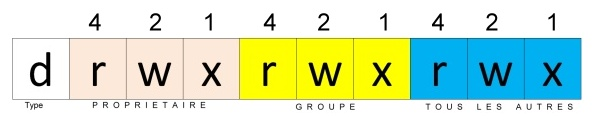

Notez que sur le serveur de l'IFB, il existe une gestion plus avancée des droits des groupes et utilisateurs appellée ACL (pour *Access Control List*). Les repertoires et fichiers concernés apparaissant  avec un `+` à la fin des droits, lesquels ne sont pas toujours explicites dans ce cas. Si des ACLs ont été appliqués, dans ce cas la commande pour voir les droits est `$ getfacl repertoire`.

In [7]:
# cell 7
getfacl .

# file: .
# owner: cvandiedonck
# group: cvandiedonck
user::rwx
group::---
other::---



- On peut combiner des options dans une même commande de manière séparée :

In [8]:
# cell 8
ls -l -h

total 844K
-rw-rw---- 1 cvandiedonck cvandiedonck 158K Jun 12 14:44 Pipe_00a-bash-bienvenue-sur-IFB.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 219K Jun 12 19:37 Pipe_00b-bash_intro-to-bash-Copy1.ipynb
-rw-rw---- 1 cvandiedonck cvandiedonck 185K Jun 12 19:37 Pipe_00b-bash_intro-to-bash.ipynb
drwxr-xr-x 5 cvandiedonck cvandiedonck 4.0K Jun 26  2023 R
-rw-r--r-- 1 cvandiedonck cvandiedonck 100K Mar  7 22:56 intro-to-bash_en.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 139K Mar  7 22:56 intro-to-jupyter-notebooks_en.ipynb
drwxrwxr-x 3 cvandiedonck cvandiedonck 4.0K Mar  9  2020 mnt
drwxr-xr-x 3 cvandiedonck cvandiedonck 4.0K Jan 29 12:08 ondemand
drwxr-xr-x 4 cvandiedonck cvandiedonck 4.0K Mar  7 20:42 to_hide


- ou groupée :

In [9]:
# cell 9
ls -lh

total 844K
-rw-rw---- 1 cvandiedonck cvandiedonck 158K Jun 12 14:44 Pipe_00a-bash-bienvenue-sur-IFB.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 219K Jun 12 19:37 Pipe_00b-bash_intro-to-bash-Copy1.ipynb
-rw-rw---- 1 cvandiedonck cvandiedonck 185K Jun 12 19:37 Pipe_00b-bash_intro-to-bash.ipynb
drwxr-xr-x 5 cvandiedonck cvandiedonck 4.0K Jun 26  2023 R
-rw-r--r-- 1 cvandiedonck cvandiedonck 100K Mar  7 22:56 intro-to-bash_en.ipynb
-rw-r--r-- 1 cvandiedonck cvandiedonck 139K Mar  7 22:56 intro-to-jupyter-notebooks_en.ipynb
drwxrwxr-x 3 cvandiedonck cvandiedonck 4.0K Mar  9  2020 mnt
drwxr-xr-x 3 cvandiedonck cvandiedonck 4.0K Jan 29 12:08 ondemand
drwxr-xr-x 4 cvandiedonck cvandiedonck 4.0K Mar  7 20:42 to_hide


Ici ces options, fréquemment utilisés, sont sous une forme courte. Mais vous pouvez très bien utiliser des arguments en forme longue, plus explicites. La plupart du temps, les arguments longs doivent être indiqués avec un double tiret : `--`


<span style="color:green">- <b>Question 1 :</b> Qu'est-ce que l'argument `-h` a permis de faire?</span>

-> Votre réponse... <span style="color:gray">-> Par défaut, l'argument -l affiche les tailles en octet ce qui n'est pas toujours lisible. L'ajout de l'argument -h permet d'afficher les tailles dans un format lisible par un humain en arrondissant dans les unités les plus appropriées (kilo-octets, mégaoctets, ...).</span>

Une combinaison d'options intéressantes est `-ltrh` qui affiche en dernier (en bas de la liste) le fichier modifié le plus récemment. L'option `-t` affiche les fichiers du plus récent au plus ancien et l'option `-r` inverse cet ordre, l’option -h pour afficher des tailles lisibles par des humains, c’est-à-dire en octets, ko, Mo et Go.

On peut même obtenir des informations détaillées sur un fichier en particulier.
Comme pour les options, il faut au moins un espace entre une commande et son ou ses arguments.

In [10]:
# cell 10
ls -lh Pipe_00a-bash-bienvenue-sur-IFB.ipynb

-rw-rw---- 1 cvandiedonck cvandiedonck 158K Jun 12 14:44 Pipe_00a-bash-bienvenue-sur-IFB.ipynb


Dans cet exemple, `ls` est la commande Unix, `-lh` sont les options et `Pipe_00a-bash-bienvenue-sur-IFB.ipynb` est l'argument.

Cette anatomie d'une instruction Unix est schématisée dans l'illustration suivante :

![](https://swcarpentry.github.io/shell-novice/fig/shell_command_syntax.svg)

Source : [Software Carpentry](https://swcarpentry.github.io/shell-novice/02-filedir/index.html).

--
#### 2.2.B. Lister le contenu de n'importe quel répertoire
---


Pour lister le contenu d'un répertoire autre que le répertoire de travail, il suffit d'utiliser la commande `ls` (suivie de ses éventuels options et arguments) suivie du **chemin absolu ou relatif** de ce répertoire.

<div class="alert alert-block alert-warning"> <b> 🧠 Rappels : </b><ul>
    <li>le <b>chemin absolu</b> commence par un <code>/</code> et toute l'arborescence depuis la racine (<i>root</i>) est donnée</il>
    <li>le <b>chemin relatif</b> est positionné par rapport à votre répertoire courant et ne démarre jamais pas un slash</li> </ul> </div>

<span style="color:blue"> - Listez le contenu du répertoire `/shared/projects/2413_rnaseq_cea`. <span>
    
<mark><span style="color:red"> Ce répertoire situé ailleurs sur le serveur de l'IFB est le répertoire dédié à notre formation. C'est dans ce répertoire que nous travaillerons à partir des prochains notebooks pour faire notre analyse. </span></mark>


In [11]:
# cell 11
ls -ltrh /shared/projects/2413_rnaseq_cea
getfacl /shared/projects/2413_rnaseq_cea/

total 112K
drwxrwx---+ 2 root         root         4.0K Jun 11 16:34 ebourneuf
drwxrwx---+ 2 root         root         4.0K Jun 11 16:35 gvinascosandoval
drwxrwx---+ 2 root         root         4.0K Jun 11 16:35 kbenmeziane
drwxrwx---+ 2 root         root         4.0K Jun 11 16:35 achicheportiche
drwxrwx---+ 2 root         root         4.0K Jun 11 16:36 vcluzet
drwxrwx---+ 2 root         root         4.0K Jun 11 16:36 cfovet
drwxrwx---+ 2 root         root         4.0K Jun 11 16:36 sgerardchantalat
drwxrwx---+ 2 root         root         4.0K Jun 11 16:37 ejougla
drwxrwx---+ 2 root         root         4.0K Jun 11 16:37 jlemaitre
drwxrwx---+ 2 root         root         4.0K Jun 11 16:37 lmadrange
drwxrwx---+ 2 root         root         4.0K Jun 11 16:38 jmataorozco
drwxrwx---+ 2 root         root         4.0K Jun 11 16:38 pmazet
drwxrwx---+ 2 root         root         4.0K Jun 11 16:38 vmonteiro
drwxrwx---+ 2 root         root         4.0K Jun 11 16:39 spetiton
drwxrwx---+ 2 root      

<span style="color:green">- <b>Question 2</b>  Quels droits avez-vous sur ces fichiers/répertoires?</span>

-> Votre réponse...<span style="color:gray">tous pour moi</span>

<div class="alert alert-block alert-info"> <b> 💡 Info :</b> <br>
A noter que le <b>répertoire courant</b> peut aussi s'indiquer avec son chemin absolu ou par un <code>.</code> ou <code>./</code> . </div>
Ainsi les 3 (ou 4) commandes suivantes retournent le même résultat !

In [12]:
# cell 12
ls

Pipe_00a-bash-bienvenue-sur-IFB.ipynb	 intro-to-jupyter-notebooks_en.ipynb
Pipe_00b-bash_intro-to-bash-Copy1.ipynb  mnt
Pipe_00b-bash_intro-to-bash.ipynb	 ondemand
R					 to_hide
intro-to-bash_en.ipynb


In [13]:
# cell 13
ls ./

Pipe_00a-bash-bienvenue-sur-IFB.ipynb	 intro-to-jupyter-notebooks_en.ipynb
Pipe_00b-bash_intro-to-bash-Copy1.ipynb  mnt
Pipe_00b-bash_intro-to-bash.ipynb	 ondemand
R					 to_hide
intro-to-bash_en.ipynb


In [14]:
# cell 14
ls .

Pipe_00a-bash-bienvenue-sur-IFB.ipynb	 intro-to-jupyter-notebooks_en.ipynb
Pipe_00b-bash_intro-to-bash-Copy1.ipynb  mnt
Pipe_00b-bash_intro-to-bash.ipynb	 ondemand
R					 to_hide
intro-to-bash_en.ipynb


In [15]:
cell 15
ls /shared/home/cvandiedonck/ ## ici remplacez cvandiedonck par votre login et transformez cette cellule au format code.

bash: cell: command not found
Pipe_00a-bash-bienvenue-sur-IFB.ipynb	 intro-to-jupyter-notebooks_en.ipynb
Pipe_00b-bash_intro-to-bash-Copy1.ipynb  mnt
Pipe_00b-bash_intro-to-bash.ipynb	 ondemand
R					 to_hide
intro-to-bash_en.ipynb


--
#### 2.2.C. Prêter attention aux noms de fichiers et répertoires
---

Sous Unix, les noms de fichiers et de répertoires sont sensibles à la casse, c'est-à-dire aux majuscules et aux minuscules. Par conséquent, le *shell* fait la différence entre le fichier `test.txt` et le fichier `Test.txt`.

Par ailleurs, l'extension de fichier est facultative et purement indicative. Le *shell* ne l'utilise pas. Elle sert simplement à l'utilisateur pour mieux organiser ses fichiers. Un nom de fichier du type `test` ou `test.my_extension` est parfaitement valide. On peut même nommer un répertoire `directory.txt` (mais ce n'est pas très malin 🙄).

Enfin, pour nommer un fichier ou un répertoire, on peut utiliser :

- les lettres minuscules,
- les lettres majuscules,
- les chiffres,
- le tiret du milieu «`-`» (mais pas comme premier caractère du nom),
- le tiret du bas «`_`»,
- le point «`.`».

On vous déconseille fortement l'utilisation d'autres caractères comme `+()[]éèàùç`. Certains caractères sont même interdits (`<>|;&`).

Enfin, ne mettez **jamais** un espace dans un nom de fichier ou de répertoire. **J-A-M-A-I-S**. Unix l'autorise mais c'est très pénible par la suite car l'espace est utilisé pour séparer les options et les arguments d'une commande.

Pour le reste, laissez faire votre imagination et utilisez des noms de fichiers et de répertoires expressifs et compréhensibles. N'oubliez pas que vous aurez souvent l'occasion de reprendre des analyses ou de récupérer des scripts ou des résultats des mois ou des années après. Facilitez-vous la vie pour plus tard !

--
#### 2.2.D. Arborescence
---

Le système de fichiers est une arborescence plus ou moins complexe constituée d'une racine, de branches et de noeuds sur une profondeur variable. 


- **Visualisez l'arborescence à partir d'un répertoire**

On peut visualiser l'arborescence à partir d'un noeud du système de fichiers à l'aide de la commande `tree`. 

Ainsi, on peut regarder l'arboresence à partir du répertoire dédié à la formation `/shared/projects/2413_rnaseq_cea/alldata/Example_Data` en le passant comme argument *(ici on donne son chemin absolu)*.

In [16]:
# cell 16
tree /shared/projects/2413_rnaseq_cea/alldata/Example_Data

/shared/projects/2413_rnaseq_cea/alldata/Example_Data
|-- TSI
|   |-- Hapmap3-TSI_13q.21.ped
|   `-- Hapmap3-TSI_13q21.info
|-- Temperatures.txt
|-- motorisation.txt
|-- poisson.txt
`-- protein.txt

1 directory, 6 files


La commande ci-dessus a été utilisée sans option. Une option très pratique est `-L` pour afficher le nombre de niveaux souhaités.

In [17]:
# cell 17
tree -L 1 /shared/projects/2413_rnaseq_cea/alldata/Example_Data # affichage de 1 niveau

/shared/projects/2413_rnaseq_cea/alldata/Example_Data
|-- TSI
|-- Temperatures.txt
|-- motorisation.txt
|-- poisson.txt
`-- protein.txt

1 directory, 4 files


- **Se déplacer dans l'arboresence**

📌 <span style="color:red">Pour rappel, nous sommes actuellement dans le répertoire qui correspond à votre home<code>~/</code> comme on le vérifie dans la cellule suivante.</span>

In [18]:
#cell 18
pwd

/shared/home/cvandiedonck


<div class="alert alert-block alert-warning"> <b> Aide: retour dans le bon répertoire "~" </b><br>En cas de problème sur cette partie 2.2.D, si vous avez besoin de refaire tourner les commandes dans l'ordre des cellules 18 à 24, retournez dans votre home <br><code>cd ~</code>et vérifiez que vous y êtes avec la commande <code>pwd</code>. Ces commandes sont déjà écrites dans la cellule 'raw' suivante. Vous avez juste besoin de la transformer en cellule de code et de l'exécuter.</div>

Pour se déplacer dans l'arborescence du système de fichiers, c'est-à-dire changer le répertoire de travail, on utilise la commande `cd` (*change directory*).

<div class="alert alert-block alert-info"> <b> 💡 Aide :</b> <br><code>cd</code> est une commande silencieuse si tout s'est bien passé, vous n'aurez de message que si le repertoire de destination n'existe pas. Aussi, afin de savoir si vous êtes arrivés à bon port, vérifiez-le avec la commande <code>pwd</code>.<br></div>


➡️ <span style="color:blue"> <u>   A vous de jouer</u>    </span> 

<span style="color:blue">- Déplacez-vous dans le sous-répertoire `alldata` du répertoire dédié `/shared/projects/2413_rnaseq_cea` en utilisant un <u>chemin relatif</u>, puis vérifier que le <b>working directory</b> a bien été modifié. Vous pouvez effectuer plusieurs lignes de code dans la même cellule. </span>

<div class="alert alert-block alert-info"> <b> 💡 Astuce :</b> <br><i>Pour remonter d'un niveau dans l'arborescence, on utilise l'écriture <code>../</code> qui désigne le répertoire "parent" du répertoire de travail.</i></div>

In [19]:
# cell 19
# votre code
cd ../../projects/2413_rnaseq_cea/alldata/
pwd

/shared/projects/2413_rnaseq_cea/alldata


<span style="color:blue">- Déplacez-vous dans le sous répertoire `Reference` du répertoire `alldata` en utilisant un <b>chemin relatif</b> et vérifiez que vous vous êtes bien déplacé dans le bon répertoire.

<div class="alert alert-block alert-info"> <b> 💡 Astuce (TRES pratique) :</b> <br> <i>Utilisez la flèche de tabulation de votre clavier pour autocompléter le nom des répertoires !</i></div>

In [20]:
# cell 20
cd ./Reference/
pwd

/shared/projects/2413_rnaseq_cea/alldata/Reference


<span style="color:blue">- Déplacez-vous à présent dans le répertoire correspondant à la formation `2413_rnaseq_cea` avec le <b>chemin relatif</b>. Vérifiez que vous y êtes bien arrivé.</span>

In [21]:
# cell 21
cd ../../
pwd

/shared/projects/2413_rnaseq_cea


<span style="color:blue">- Déplacez-vous dans le répertoire `alldata` en utilisant le <b>chemin relatif</b>. Vérifiez où vous êtes.</span>

In [22]:
# cell 22
cd ./alldata/
pwd

/shared/projects/2413_rnaseq_cea/alldata


<span style="color:blue">- Retournez à présent dans le répertoire `2413_rnaseq_cea` en utilisant le <b>chemin absolu</b>. Vérifiez où vous êtes.

In [23]:
# cell 23
cd /shared/projects/2413_rnaseq_cea/
pwd

/shared/projects/2413_rnaseq_cea


On peut utiliser des **raccourcis** pour se déplacer plus vite :

- pour revenir dans le répertoire utilisateur (répertoire par défaut dans lequel se trouve l'utilisateur lorsqu'il lance un *shell*), le raccourci est `~`

In [24]:
# cell 24
cd ~
pwd

/shared/home/cvandiedonck


* taper simplement la commande `cd` (sans argument) ramène aussi l'utilisateur dans son répertoire personnel.

- pour revenir dans le répertoire précédent, il suffit d'ajouter l'option `-`

In [25]:
# cell 25
cd -
pwd


/shared/projects/2413_rnaseq_cea
/shared/projects/2413_rnaseq_cea


--
#### 2.2.E. Espace disque utilisé
---

📌 <span style="color:red">Nous sommes actuellement dans le répertoire <code>/shared/projects/2413_rnaseq_cea</code>.</span>


<div class="alert alert-block alert-warning"> <b> Aide: retour dans le bon répertoire "shared/projects/2413_rnaseq_cea" </b><br>En cas de problème sur cette partie 2.2.E, si vous avez besoin de refaire tourner les commandes dans l'ordre des cellules 25 à 29, retournez dans le bon répertoire avec la commande <br><code>cd /shared/projects/2413_rnaseq_cea/</code> et vérifiez que vous y êtes avec la commande <code>pwd</code>. Ces commandes sont déjà écrites dans la cellule 'raw' suivante. Vous avez juste besoin de la transformer en cellule de code et de l'exécuter.</div>

- **Sur un répertoire**

Afin de connaître l'espace occupé par un répertoire, il faut utiliser la commande `du` pour *disk usage*.
Plusieurs arguments peuvent être utilisés comme indiqué dans l'aide.

In [26]:
# cell 26
du --help

Usage: du [OPTION]... [FILE]...
  or:  du [OPTION]... --files0-from=F
Summarize disk usage of each FILE, recursively for directories.

Mandatory arguments to long options are mandatory for short options too.
  -0, --null            end each output line with 0 byte rather than newline
  -a, --all             write counts for all files, not just directories
      --apparent-size   print apparent sizes, rather than disk usage; although
                          the apparent size is usually smaller, it may be
                          larger due to holes in ('sparse') files, internal
                          fragmentation, indirect blocks, and the like
  -B, --block-size=SIZE  scale sizes by SIZE before printing them; e.g.,
                           '-BM' prints sizes in units of 1,048,576 bytes;
                           see SIZE format below
  -b, --bytes           equivalent to '--apparent-size --block-size=1'
  -c, --total           produce a grand total
  -D, --dereference-args  de

<span style="color:green">- <b>Question 3</b>  Que vous affiche la commande ci-dessous?</span>


In [27]:
# cell 27
du -sh .

538G	.


-> Votre réponse...<span style="color:gray">Espace occupé par le repertoire parent (.) = un seul niveau (-s) en mode lisible humain (-h).</span>

La commande ci-après donne un résultat similaire avec également les répertoires cachés

In [28]:
# cell 28
du -hd1

4.0K	./cfovet
45G	./scaburet
54M	./.git
4.0K	./lmadrange
26M	./.ipynb_checkpoints
35M	./pipeline
4.0K	./achicheportiche
4.0K	./nseddiki
253G	./allData-old
4.0K	./sgerardchantalat
4.0K	./noussada
4.0K	./kbaczkowski
4.0K	./jrussick
4.0K	./esaindoy
4.0K	./vmonteiro
4.0K	./pmazet
4.0K	./kbenmeziane
4.0K	./ejougla
4.0K	./jlemaitre
4.0K	./jmataorozco
4.0K	./gvinascosandoval
4.0K	./bporcel
4.6M	./staff
135G	./alldata
4.0K	./jpons
38G	./cvandiedonck
69G	./data11
4.0K	./vcluzet
4.0K	./spetiton
4.0K	./ebourneuf
538G	.


<span style="color:green">- <b>Question 4 :</b>  Qu'apporte l'agument `d2` dans la commande ci-dessous comparé à la commande avec `d1`?</span>

In [29]:
# cell 29
du -hd2 .

4.0K	./cfovet
600K	./scaburet/.ipynb_checkpoints
31G	./scaburet/Results
4.8M	./scaburet/stuff
14G	./scaburet/Data
536K	./scaburet/run_notebooks
45G	./scaburet
54M	./.git/objects
68K	./.git/logs
64K	./.git/hooks
8.0K	./.git/info
28K	./.git/refs
54M	./.git
4.0K	./lmadrange
26M	./.ipynb_checkpoints
34M	./pipeline/.git
544K	./pipeline/.ipynb_checkpoints
35M	./pipeline
4.0K	./achicheportiche
4.0K	./nseddiki
20K	./allData-old/.ipynb_checkpoints
161G	./allData-old/Results
93G	./allData-old/Reference
253G	./allData-old
4.0K	./sgerardchantalat
4.0K	./noussada
4.0K	./kbaczkowski
4.0K	./jrussick
4.0K	./esaindoy
4.0K	./vmonteiro
4.0K	./pmazet
4.0K	./kbenmeziane
4.0K	./ejougla
4.0K	./jlemaitre
4.0K	./jmataorozco
4.0K	./gvinascosandoval
4.0K	./bporcel
272K	./staff/.ipynb_checkpoints
4.6M	./staff
61G	./alldata/Data
92K	./alldata/Example_Data
27G	./alldata/Reference
47G	./alldata/Results
17M	./alldata/Article
4.0K	./alldata/.ipynb_checkpoints
135G	./alldata
4.0K	./jpons
38G	./cvandiedonck/2023
28M	./c

-> Votre réponse...<span style="color:gray">-> L'argument d permet d'afficher le total (taille) à une profondeur donnée. Avec d1 on a la même profondeur qu'avec -s .: les informations de taille sont données pour le répertoire courant. En indiquant -d2, on a les tailles sur 2 niveaux de profondeur depuis le répertoire courant.</span>

- **Sur toute la machine**

La commande `df` pour *disk free* donne sur chacun des volumes de la machine l'espace libre et l'espace occupé.

In [30]:
# cell 30
df -h

Filesystem                                       Size  Used Avail Use% Mounted on
devtmpfs                                         126G     0  126G   0% /dev
tmpfs                                            126G   15M  126G   1% /dev/shm
tmpfs                                            126G  235M  126G   1% /run
tmpfs                                            126G     0  126G   0% /sys/fs/cgroup
/dev/mapper/system-root                           30G  490M   29G   2% /
/dev/mapper/system-usr                           9.8G  2.4G  7.5G  24% /usr
/dev/sda2                                        2.0G  188M  1.8G  10% /boot
/dev/mapper/system-var                           9.8G  7.3G  2.6G  75% /var
/dev/mapper/system-home                          3.9G   33M  3.9G   1% /home
/dev/mapper/system-opt                           4.9G   33M  4.9G   1% /opt
/dev/mapper/system-tmp                           3.6T  374M  3.6T   1% /tmp
192.168.16.184@tcp:192.168.16.186@tcp:/ifbstor1  2.0P  918T  1.1P  47

---
---

## 3. Manipulation de fichiers et répertoires
---

📌 <span style="color:red">Nous sommes actuellement dans le répertoire <code>/shared/projects/2413_rnaseq_cea</code>.</span>


<div class="alert alert-block alert-warning"> <b> Aide: retour dans le bon répertoire "/shared/projects/2413_rnaseq_cea" </b><br>En cas de problème sur cette partie 3, si vous avez besoin de refaire tourner les commandes dans l'ordre des cellules 30 à 32, retournez dans le bon répertoire avec la commande <br><code>cd /shared/projects/2413_rnaseq_cea/</code> et vérifiez que vous y êtes avec la commande <code>pwd</code>. Ces commandes sont déjà écrites dans la cellule 'raw' suivante. Vous avez juste besoin de la transformer en cellule de code et de l'exécuter.</div>

--
### 3.1. Création d'un répertoire et d'un fichier
---


<div class="alert alert-block alert-danger"> 🚨 <b>Attention:</b> <br><br>
En principe, il existe dans "/shared/2413_rnaseq_cea/"un repertoire qui porte le nom de votre login: <code>/shared/projects/2413_rnaseq_cea/votre_login/</code>. <br><br>
<b>=> C'est votre répertoire personnel associé au projet/à la formation <i>(disponible jusqu'au 31/12/2024)</i>.</b><br>
<br>
Vérifiez qu'il est bien présent dans la cellule suivante avec la commande <code>ls</code>.<br>
S'il n'est pas créé, veuillez appeler un des enseignants ou un assistant avant de le créer avec la commande <code>mkdir -p /shared/projects/2413_rnaseq_cea/$USER/ <code>
</div>



In [31]:
#cell 31
ls # pour vérifier que vous avez un répertoire avec votre login dans le repertoire du projet

achicheportiche  data11		   jmataorozco	noussada	  spetiton
allData-old	 ebourneuf	   jpons	nseddiki	  staff
alldata		 ejougla	   jrussick	pipeline	  tmp_file.txt
bporcel		 esaindoy	   kbaczkowski	pmazet		  vcluzet
cfovet		 gvinascosandoval  kbenmeziane	scaburet	  vmonteiro
cvandiedonck	 jlemaitre	   lmadrange	sgerardchantalat


- Pour **créer un répertoire**, on utilise la commande `mkdir` (*make directory*) suivie du chemin du nouveau répertoire et de son nom.

➡️ <span style="color:blue"> <u>   A vous de jouer</u>    </span> 

<span style="color:blue">- depuis votre répertoire courant, créez un répertoire temporaire `tmp` dans votre dossier <u>personnel</u> du projet `/shared/2413_rnaseq_cea/` puis déplacez-vous dans ce répertoire et vérifiez que vous y êtes </span>

In [32]:
# cell 32
mkdir ./cvandiedonck/tmp/
cd ./cvandiedonck/tmp/
pwd

/shared/projects/2413_rnaseq_cea/cvandiedonck/tmp


- Pour **créer un fichier**, on utilise la commande `touch` suivie du chemin du nouveau fichier avec son nom. 

<span style="color:blue">- Créez un fichier texte `tmp_file.txt` dans le répertoire `tmp` et vérifiez qu'il a bien été créé avec `ls`.</span>

In [33]:
# cell 33
touch ./tmp_file.txt
ls

tmp_file.txt


--

### 3.2. Copie d'un fichier ou d'un répertoire
---

➡️ <span style="color:blue"> <u>   A vous de jouer</u>    </span> 

- Pour **copier un fichier**, on utilise la commande `cp` (*copy*) suivie du chemin (absolu ou relatif) du fichier source, suivi du chemin (absolu ou relatif) du répertoire de copie. 

<span style="color:blue">- Sans vous déplacer, copiez le fichier `Temperatures.txt` présent dans le répertoire du projet `alldata/Example_Data` dans le répertoire `tmp`. NB: il vous faudra réfléchir à la localisation du fichier et du répertoire par rapport au <i>working directory</i>. La tabulation peut de nouveau vous aider à autocompléter les noms des répertoires/fichiers. N'hésitez pas à ajouter une cellule pour vérifier quel est votre répertoire courant si vous l'avez oublié.</span>

In [34]:
# cell 34
pwd
cp ../../alldata/Example_Data/Temperatures.txt .

/shared/projects/2413_rnaseq_cea/cvandiedonck/tmp


<span style="color:blue">-Quelle commande pouvez-vous utiliser pour vérifier que vous avez bien copié le bon fichier au bon endroit ?</span>

In [35]:
# cell 35
ls

Temperatures.txt  tmp_file.txt


- Pour **copier un répertoire**, la commande est également `cp` en ajoutant l'argument `-r` pour recursif (*recursive*) afin de copier le contenu du répertoire également. Par exemple, dans la cellule suivante, on copie le répertoire `2413_rnaseq_cea/alldata/Example_Data` dans le répertoire courant `tmp` et on vérifie qu'il y est.

In [36]:
# cell 36
cp -r ../../alldata/Example_Data/ .
ls

Example_Data  Temperatures.txt	tmp_file.txt


<span style="color:red">Pour faciliter la suite des commandes, déplacez vous dans votre répertoire personnel avec la commande suivante. Ici, nous avons mis la *variable* `$USER` à la place de votre identifiant. Nous expliquerons un peu plus loin les variables.</span>

In [37]:
# cell 37
cd /shared/projects/2413_rnaseq_cea/$USER/ 
pwd

/shared/projects/2413_rnaseq_cea/cvandiedonck


--
### 3.3 Suppression d'un fichier ou d'un répertoire
---

- Pour **supprimer un fichier**, on utilise la commande `rm` (*remove*) suivie du chemin du fichier à supprimer. 

<span style="color:blue">- Supprimez le fichier `Temperatures.txt` situé dans `tmp` et vérifiez que la suppression a bien eu lieu.</span>


In [38]:
# cell 38
rm ./tmp/Temperatures.txt
ls ./tmp

Example_Data  tmp_file.txt


<div class="alert alert-block alert-danger"> 🚨 <b>Attention:</b> <br>Il n’y a pas de corbeille dans le shell Unix, c’est-à-dire aucune possibilité de récupérer un fichier ou un répertoire effacé par erreur. Pensez à sauvegarder régulièrement vos fichiers. </div>

- Pour **supprimer un répertoire** il existe deux méthodes :

**1.** Celle qui fonctionne toujours, **que le répertoire soit vide ou non**,  utilise `rm -r` puis le nom du répertoire. Par exemple, nous pouvons supprimer le répertoire `Example_Data` que nous avions copié dans `tmp` ainsi:

In [39]:
# cell 39
rm -r ./tmp/Example_Data
ls ./tmp/

tmp_file.txt


<div class="alert alert-block alert-danger"> 🚨 <b>Attention:</b> <br>La commande <b>rm -r</b> supprime le répertoire et bien évidemment tout son contenu. Vous pourriez le regretter. Par prudence, la seconde solution est conseillée. </div>

**2. Si le répertoire est vide**, le mieux est d'utiliser `rmdir`. Cette commande ne fonctionne que si le répertoire est vide. Vous pouvez donc le vider avant. C'est ce que nous allons faire en vidant ce qui reste dans le répertoire `tmp` avant de le supprimer.

In [40]:
# cell 40
rm ./tmp/tmp_file.txt
rmdir tmp
ls

2023  autres_archives  ongoing	temporary


<div class="alert alert-block alert-info">Avant de passer à la suite de ce notebook on recrée un répertoire temporaire <b>tmp2</b> dans lequel on copie de nouveau le fichier <b>Temperatures.txt</b>.</div>

In [41]:
# cell 41
mkdir -p tmp2
cd tmp2
pwd
cp ../../alldata/Example_Data/Temperatures.txt .
ls

/shared/projects/2413_rnaseq_cea/cvandiedonck/tmp2
Temperatures.txt


--
### 3.4. Déplacer ou renommer un fichier ou un répertoire avec `mv`
---

- Pour **déplacer (*sans le copier*) un fichier vers un répertoire cible**, on utilise la commande `mv` (*move*) suivie en 1er argument du chemin du fichier à déplacer, puis en 2ème argument du chemin du répertoire cible. 

On déplace par exemple le fichier `Temperatures.txt` actuellement présent dans le répertoire `tmp2` dans le répertoire parent (votre repertoire personnel).

In [42]:
# cell 42
mv ./Temperatures.txt ../

<span style="color:green">- <b>Question 5</b>  Expliquez pas à pas le détail de la commande ci-dessus.</span>

-> Réponse <span style="color:gray">-> mv sert à déplacer un fichier ou répertoire, ./Temperatures.txt indique qu'on prend le fichier Temperatures.txt actuellement présent dans le répertoire courant (./). La destination est ../ ce qui indique qu'il s'agit du répertoire parent (repertoire personnel du projet) du répertoire courant (tmp2).</span>

Une fois déplacé, le fichier n'est plus dans le répertoire initial comme on peut s'en assurer ci-dessous.

In [43]:
# cell 43
ls

Vous auriez pu en profiter également pour changer le nom du fichier déplacé en indiquant un nouveau nom après le chemin du répertoire de destination (sans espace). Par exemple on le remet dans `tmp2` en le renommant `Temperatures2.txt`.

In [44]:
# cell 44
mv ../Temperatures.txt ./Temperatures2.txt

<span style="color:green">- <b>Question 6</b>  Expliquez pas à pas le détail de la commande ci-dessus.</span>

-> Réponse <span style="color:gray">-> Cette fois-ci on déplace tout en renommant avec mv le fichier Temperatures.txt actuellement présent dans le répertoire parent (repertoire personnel du projet) du répertoire courant (tmp2). La destination est le répertoire courant (./) en donnant un nouveau nom Temperatures2.txt au fichier ainsi déplacé. Le fichier source n'est plus présent dans le répertoire source.</span>

- Pour **renommer un fichier**, on utilise en effet également la commande `mv` (*move*) suivie en 1er argument du nom du fichier à renommer, puis en 2ème argument du nouveau nom. C'est donc possible sans changer de répertoire!

Par exemple, on renomme le fichier `Temperatures2.txt` de notre répertoire courant en `Temperatures3.txt`.

In [45]:
# cell 45
mv Temperatures2.txt Temperatures3.txt
ls

Temperatures3.txt


- Pour **déplacer ou renommer un répertoire** on utilise également la commande `mv`, ce qui déplace le répertoire et tout son contenu. Par exemple, on va renommer le répertoire `tmp2` en `tmp3`.

In [46]:
# cell 46
cd ..
mv tmp2 tmp3

In [47]:
# cell 47
ls

2023  autres_archives  ongoing	temporary  tmp3


In [48]:
# cell 48
ls tmp3

Temperatures3.txt


--
### 3.5. Trucs et astuces
---

**Dans un notebook ou un terminal :**

- Complétion automatique

La touche tabulation <kbd>Tab</kbd> est utile pour compléter une commande, un nom de répertoire ou de fichier. Appuyez deux fois sur <kbd>Tab</kbd> en cas d’ambiguïté.

Par exemple, si vous tapez `/h` puis la touche <kbd>Tab</kbd>, le *shell* va compléter automatiquement à `/home`.


- Copier / coller

Pour copier / coller quelque chose dans le *shell*, sélectionnez du texte puis utilisez les combinaisons de touches <kbd>Ctrl</kbd>+<kbd>C</kbd> pour copier et <kbd>Ctrl</kbd>+<kbd>V</kbd> (ou <kbd>Ctrl</kbd>+<kbd>Maj</kbd>+<kbd>V</kbd>) pour coller.

**et seulement dans un terminal :**

- Arrêter une commande en cours

Pressez la touche <kbd>Ctrl</kbd> et la touche <kbd>C</kbd> en même temps pour arrêter une commande en cours.

- Rappel des anciennes commandes

Écrire des commandes dans un *shell* peut sembler rébarbatif mais on gagne rapidement en efficacité avec les astuces suivantes.

La flèche du haut <kbd>↑</kbd> rappelle les commandes précédentes (depuis la plus récente jusqu'à la plus ancienne).


**Automatiser (un peu)**

Les caractères `*` et `?` peuvent remplacer n'importe quels caractères dans les noms de fichiers ou de répertoires :

- `*` remplace 0, 1 ou plus caractères.
- `?` remplace exactement 1 caractère.

Par exemple :

In [49]:
# cell 49
ls /shared/projects/2413_rnaseq_cea/alldata/Example_Data/pro?ein.txt

/shared/projects/2413_rnaseq_cea/alldata/Example_Data/protein.txt


In [50]:
# cell 50
ls /shared/projects/2413_rnaseq_cea/alldata/Example_Data/*.txt

/shared/projects/2413_rnaseq_cea/alldata/Example_Data/Temperatures.txt
/shared/projects/2413_rnaseq_cea/alldata/Example_Data/motorisation.txt
/shared/projects/2413_rnaseq_cea/alldata/Example_Data/poisson.txt
/shared/projects/2413_rnaseq_cea/alldata/Example_Data/protein.txt


Ces caractères sont très utiles quand il s'agit d'effectuer une opération sur plusieurs fichiers en même temps.
Cela fonctionne avec autant de fichiers qu'on le souhaite.   
Vous pouvez donc imaginer la puissance d'une commande `rm *.*` ...😱


---
---
## 4. Lire, explorer un fichier et écrire dedans
---

<div class="alert alert-block alert-warning"> 📌 <span style="color:red">Retournons dans votre répertoire personnel du projet <code>/shared/projects/2413_rnaseq_cea</code>.</span></div>


In [51]:
# cell 51
cd /shared/projects/2413_rnaseq_cea/$USER/ 
pwd

/shared/projects/2413_rnaseq_cea/cvandiedonck


### 4.1. Lire un fichier
---

- Pour **visualiser le contenu d'un fichier** de type texte (on verra dans la semaine qu'il existe d'autres formats), on utilise la commande `cat` (pour *concatenate*) suivie du chemin du fichier à visualiser. 

<span style="color:blue">- Déplacez-vous dans le répertoire `/shared/projects/2413_rnaseq_cea/alldata/Example_Data/TSI`.
Visualisez le contenu du fichier `Hapmap3-TSI_13q21.info` situé dans ce répertoire . </span>

In [52]:
# cell 52
#votre code
cd /shared/projects/2413_rnaseq_cea/alldata/Example_Data/TSI
ls

cat Hapmap3-TSI_13q21.info


Hapmap3-TSI_13q.21.ped	Hapmap3-TSI_13q21.info
rs9569366	55232916
rs9597258	55234440
rs4885941	55234854
rs11839457	55243360
rs9591687	55249342
rs9569373	55254118
rs7334154	55259125
rs6561867	55267869
rs9597267	55268861
rs4597206	55274285
rs2997106	55278733
rs3015425	55280381
rs12585364	55286848
rs2997114	55287986
rs2997118	55290109
rs2935461	55302250
rs9569384	55306855
rs1391044	55311160
rs1532453	55315271
rs1391041	55324975
rs10507603	55328914
rs2645938	55329151
rs1117969	55334130
rs2645929	55342530
rs1497292	55348261
rs2645924	55348356
rs2801621	55352569
rs2645920	55357235
rs17052609	55366456
rs2801618	55368150
rs9591697	55368450
rs2801617	55368842
rs17052626	55369150
rs3015430	55371003
rs1995099	55374794
rs975273	55379417
rs1587260	55381246
rs17052641	55384997
rs9537297	55387445
rs9527458	55391080
rs7993035	55397589
rs9597296	55403182
rs1497301	55407531
rs2201715	55409754
rs7992310	55418764
rs11617045	55419026
rs7993082	55419220
rs9597307	55426306
rs1497302	55429744
rs7989771	5543415

Il s'agit d'un fichier au format `.info` d'Haploview, un logiciel d'analyse génétique. Il liste les marqueurs génétiques analysés, chaque ligne décrivant un SNP (*identifiant*, *position physique sur le chromosome*).

- Souvent les fichiers sont très longs. Si vous travaillez sur le terminal, la commande `less` qui affiche progressivement le contenu un fichier est recommandée. Dans un notebook, on recommande de ne **visualiser** que le **début** ou la **fin** du fichier. Les commandes dédiées à ces tâches sont `head` et `tail`. 

<span style="color:blue">-Exécutez-les sur le fichier `Hapmap3-TSI_13q21.info`.</span>


In [53]:
# cell 53
head Hapmap3-TSI_13q21.info

rs9569366	55232916
rs9597258	55234440
rs4885941	55234854
rs11839457	55243360
rs9591687	55249342
rs9569373	55254118
rs7334154	55259125
rs6561867	55267869
rs9597267	55268861
rs4597206	55274285


In [54]:
# cell 54
tail Hapmap3-TSI_13q21.info

rs2314014	55448804
rs10467541	55454251
rs573051	55455450
rs12584224	55464336
rs442714	55464860
rs494175	55466299
rs9563369	55469632
rs9597316	55471531
rs7997193	55472364
rs8000414	55472527


Les commandes `head` et `tail`  en bash n'affiche que 10 lignes par défaut.

L'option `-n`précise le nombre de lignes à afficher. Par exemple :

In [55]:
# cell 55
head -n 2 Hapmap3-TSI_13q21.info

rs9569366	55232916
rs9597258	55234440


ou avec tail en n'affichant que les 3 dernières lignes:


In [56]:
# cell 56
tail -n 3 Hapmap3-TSI_13q21.info

rs9597316	55471531
rs7997193	55472364
rs8000414	55472527


On peut s'amuser à afficher tout le contenu sauf les 50 premières lignes</span>


In [57]:
# cell 57
tail -n +51 Hapmap3-TSI_13q21.info

rs12430288	55444122
rs377576	55448019
rs2314014	55448804
rs10467541	55454251
rs573051	55455450
rs12584224	55464336
rs442714	55464860
rs494175	55466299
rs9563369	55469632
rs9597316	55471531
rs7997193	55472364
rs8000414	55472527


ou tout le contenu sauf les 60 dernières lignes :


In [58]:
# cell 58
head -n -60 Hapmap3-TSI_13q21.info

rs9569366	55232916
rs9597258	55234440


--
### 4.2. Compter les éléments d'un fichier
---


- On peut **compter le nombre de caratères, mots, ou lignes** (mais aussi de caractères et de mots) d'un fichier texte à l'aide de la commande `wc`.

Avec son argument `-l` (pour *line*), vous comptez le nombre de lignes.

<span style="color:blue">- Comptez le nombre de lignes du fichier `Hapmap3-TSI_13q21.info`</span>


In [59]:
# cell 59
wc -l Hapmap3-TSI_13q21.info

62 Hapmap3-TSI_13q21.info


Avec d'autres arguments, vous comptez d'autres éléments.

In [60]:
# cell 60
wc --help

Usage: wc [OPTION]... [FILE]...
  or:  wc [OPTION]... --files0-from=F
Print newline, word, and byte counts for each FILE, and a total line if
more than one FILE is specified.  With no FILE, or when FILE is -,
read standard input.  A word is a non-zero-length sequence of characters
delimited by white space.
The options below may be used to select which counts are printed, always in
the following order: newline, word, character, byte, maximum line length.
  -c, --bytes            print the byte counts
  -m, --chars            print the character counts
  -l, --lines            print the newline counts
      --files0-from=F    read input from the files specified by
                           NUL-terminated names in file F;
                           If F is - then read names from standard input
  -L, --max-line-length  print the length of the longest line
  -w, --words            print the word counts
      --help     display this help and exit
      --version  output version information 

In [61]:
# cell 61
wc -w Hapmap3-TSI_13q21.info

124 Hapmap3-TSI_13q21.info


In [62]:
# cell 62
wc Hapmap3-TSI_13q21.info

  62  124 1183 Hapmap3-TSI_13q21.info


<span style="color:green">- <b>Question 7</b>  Expliquez les résultat des deux commandes ci-dessus en consultant l'aide de la commande.</span>

-> Votre réponse ... <span style="color:gray">-> Dans la cellule 61, l'argument -w permet de compter le nombre de mots. Il y en a 124 ce qui est normal car le fichier avait 62 lignes et 2 mots par ligne (ouvrez le en double cliquant dessus depuis le navigateur du Jupyter Lab pour en être convaincu). Dans la cellule 62, aucun argument n'a été ajouté. Dans ce cas, l'aide indique que la commande affiche d'abord le nombre de lignes, puis le nombre de mots puis le nombre d'octets (taille). </span>

- On peut compter les éléments *uniques* avec la commande `uniq`

La commande `uniq` affiche les éléments uniques.

Par exemple avec le contenu du fichier `/shared/projects/2413_rnaseq_cea/alldata_Example_Data/protein.txt` :

In [63]:
# cell 63
cat /shared/projects/2413_rnaseq_cea/alldata/Example_Data/protein.txt

insulin
insulin
insulin
insulin
insulin
insulin
integrin
integrin
rhodopsin
rhodopsin
rhodopsin
transferrin
transferrin
transferrin
transferrin


On obtient alors uniquement les lignes uniques :

In [64]:
# cell 64
uniq /shared/projects/2413_rnaseq_cea/alldata/Example_Data/protein.txt

insulin
integrin
rhodopsin
transferrin


L'option `-c` compte le nombre de fois qu'un élément est présent :

In [65]:
# cell 65
uniq -c /shared/projects/2413_rnaseq_cea/alldata/Example_Data/protein.txt

      6 insulin
      2 integrin
      3 rhodopsin
      4 transferrin


La commande `uniq` ne fonctionne que sur un fichier trié, c'est-à-dire pour lequel les lignes sont déjà triées par ordre alphabétique.

--
### 4.3. Triez des lignes d'un fichier
---

- Avec la commande `sort`, il est possible de **trier les lignes** d'un fichier selon un ordre ascendant, descendant, voire aléatoire selon les valeurs d'une colonne. 

In [66]:
# cell 66
sort --help

Usage: sort [OPTION]... [FILE]...
  or:  sort [OPTION]... --files0-from=F
Write sorted concatenation of all FILE(s) to standard output.

Mandatory arguments to long options are mandatory for short options too.
Ordering options:

  -b, --ignore-leading-blanks  ignore leading blanks
  -d, --dictionary-order      consider only blanks and alphanumeric characters
  -f, --ignore-case           fold lower case to upper case characters
  -g, --general-numeric-sort  compare according to general numerical value
  -i, --ignore-nonprinting    consider only printable characters
  -M, --month-sort            compare (unknown) < 'JAN' < ... < 'DEC'
  -h, --human-numeric-sort    compare human readable numbers (e.g., 2K 1G)
  -n, --numeric-sort          compare according to string numerical value
  -R, --random-sort           sort by random hash of keys
      --random-source=FILE    get random bytes from FILE
  -r, --reverse               reverse the result of comparisons
      --sort=WORD             

In [67]:
# cell 67
sort -n -r -k2 Hapmap3-TSI_13q21.info

rs8000414	55472527
rs7997193	55472364
rs9597316	55471531
rs9563369	55469632
rs494175	55466299
rs442714	55464860
rs12584224	55464336
rs573051	55455450
rs10467541	55454251
rs2314014	55448804
rs377576	55448019
rs12430288	55444122
rs7989771	55434151
rs1497302	55429744
rs9597307	55426306
rs7993082	55419220
rs11617045	55419026
rs7992310	55418764
rs2201715	55409754
rs1497301	55407531
rs9597296	55403182
rs7993035	55397589
rs9527458	55391080
rs9537297	55387445
rs17052641	55384997
rs1587260	55381246
rs975273	55379417
rs1995099	55374794
rs3015430	55371003
rs17052626	55369150
rs2801617	55368842
rs9591697	55368450
rs2801618	55368150
rs17052609	55366456
rs2645920	55357235
rs2801621	55352569
rs2645924	55348356
rs1497292	55348261
rs2645929	55342530
rs1117969	55334130
rs2645938	55329151
rs10507603	55328914
rs1391041	55324975
rs1532453	55315271
rs1391044	55311160
rs9569384	55306855
rs2935461	55302250
rs2997118	55290109
rs2997114	55287986
rs12585364	55286848
rs3015425	55280381
rs2997106	55278733
rs459720

<span style="color:green">- <b>Question 8 :</b> Quel tri a été fait dans la commande précédente? Expliquez les 3 arguments. </span>

-> Votre réponse: <span style="color:gray">-> Le tri est numérique, avec une clé de tri correspondant à la 2e colonne, et dans l'ordre décroissant.</span>


<div class="alert alert-block alert-info"> Dans Unix, on peut enchaîner 2 commandes en utilisant à la suite en utilisant le pipe `<b>|</b>` (touche <kbd>AltGr</kbd>+<kbd>6</kbd> sur un clavier Azerty PC ou <kbd>Alt</kbd>+<kbd>MAJ</kbd>+<kbd>l</kbd> sur un clavier Azerty Mac). La commande située à gauche du pipe s'exécute en premier et son résultat est directement utilisé par la commande située après le pipe.</div> 

In [68]:
# cell 68
sort -n -r -k2 Hapmap3-TSI_13q21.info | head

rs8000414	55472527
rs7997193	55472364
rs9597316	55471531
rs9563369	55469632
rs494175	55466299
rs442714	55464860
rs12584224	55464336
rs573051	55455450
rs10467541	55454251
rs2314014	55448804


Ci-dessus on a donc enchainé le tri et décidé de n'afficher que les 10 premières lignes du résultat du tri. On voit que cela correspond à l'ordre inverse des 10 dernières lignes du fichier non trié.

In [69]:
# cell 69
tail Hapmap3-TSI_13q21.info

rs2314014	55448804
rs10467541	55454251
rs573051	55455450
rs12584224	55464336
rs442714	55464860
rs494175	55466299
rs9563369	55469632
rs9597316	55471531
rs7997193	55472364
rs8000414	55472527


--
### 4.4. Extraire les colonnes d'un fichier
---

- Lorsque le fichier texte est un **"fichier plat"** (chaque ligne contient le même nombre de colonnes, séparées les unes des autres par un délimiteur), il est possible d'**extraire uniquement certaines colonnes** avec la commande `cut`. 

Pour l'exemple, nous allons regarder le fichier `Hapmap3-TSI_13q.21.ped`. Ce fichier est un fichier de génétique au format `.ped` contenant pour chaque ligne les informations pour un individu donné, avec dans les 6 premières colonnes des informations d'identifiant sur cet un individu (identifiant de la famille, identifiant de l'individu, identifiant du père, identifiant de la mère, sexe, statut par rapport à la maladie). Les colonnes suivantes contiennent les génotypes pour chacun des marqueurs listé dans le fichier `.info` ou `.map` correspondant.

Affichons d'abord les 10 premières lignes.

In [70]:
# cell 70
head Hapmap3-TSI_13q.21.ped

NA20502 NA20502 0 0 2 0 C C G A A G A G C C T T A G G G T C G A C A C C G G T G T G G A T T G A T T T G A A T G G G G G G G C C C C C C A A A A G G T T G G A A G A G G T T A A C C T T C C A A A A C C C C G G A A G G C C C C A A A G G G T C T C G A C C A G C C A G C T C A
NA20504 NA20504 0 0 2 0 C C G A A G A G T C T T A G A G T C G A C A T C G G T G 0 0 G A T T G A C T T G A A T G A G G G G G C C C C C C A A A A G G T T A G A A A A G G T T A A C C C T C C A A A A C C C C A G A A A G C C C C A A A G G G C C C C A A C C G G C C G G T T A A
NA20505 NA20505 0 0 2 0 C C G A A G A G T C T T A G A G T C G A C A T C G G T G T G G A T T G A C T T G A A T G A G G G G G C C C C C C A A A A G G T T A G A A G A G G T T A A C C T T C C A A A A C C C C A G A A G G C C C C A A A A G G C C C C A A C C G G C C G G T T A A
NA20506 NA20506 0 0 2 0 C C G A A G A G T C T T A G A G T C G A C A T C G G T G T G G A T T G A C T G G A A G G A G G G G G C C C C C C A A A A G G T T G G A A A A G G C T A A T C C T 

Chaque ligne commence par un identifiant au format `NAXXXXX` dans cet exemple. Comme 62 marqueurs ont été génotypés, l'affichage de chaque ligne continue en dessous.

Consultons l'aide de la commande `cut` pour connaitre les options possibles. 

In [71]:
# cell 71
cut --help

Usage: cut OPTION... [FILE]...
Print selected parts of lines from each FILE to standard output.

Mandatory arguments to long options are mandatory for short options too.
  -b, --bytes=LIST        select only these bytes
  -c, --characters=LIST   select only these characters
  -d, --delimiter=DELIM   use DELIM instead of TAB for field delimiter
  -f, --fields=LIST       select only these fields;  also print any line
                            that contains no delimiter character, unless
                            the -s option is specified
  -n                      with -b: don't split multibyte characters
      --complement        complement the set of selected bytes, characters
                            or fields
  -s, --only-delimited    do not print lines not containing delimiters
      --output-delimiter=STRING  use STRING as the output delimiter
                            the default is to use the input delimiter
      --help     display this help and exit
      --version  ou

Sélectionnons à présent les 6 premières colonnes du fichier.

In [72]:
# cell 72
cut -d" " -f1-6 Hapmap3-TSI_13q.21.ped | head

NA20502 NA20502 0 0 2 0
NA20504 NA20504 0 0 2 0
NA20505 NA20505 0 0 2 0
NA20506 NA20506 0 0 2 0
NA20508 NA20508 0 0 2 0
NA20509 NA20509 0 0 1 0
NA20510 NA20510 0 0 1 0
NA20512 NA20512 0 0 1 0
NA20515 NA20515 0 0 1 0
NA20516 NA20516 0 0 1 0


<span style="color:green">- <b>Question 9:</b> Expliquez la commande ci-dessus. </span>

-> Votre réponse...<span style="color:gray"> -> Le séparateur étant un expace plutôt qu'une tabulation, on utilise -d pour indiquer le type de séparateur, puis on choisit les colonnes 1 à 6 avec l'agrument -f. On idnique ensuite le fichier sur lequel on réalise ces manipulations. Le résultat de cette 1ère commande est envoyé comme input de la commande head grâce au pipe |.</span>

<div class="alert alert-block alert-info"> <b> Information: </b>Vous noterez que l'ordre dans le fichier `Hapmap3-TSI_13q21.info` n'a pas été modifié, et que toutes les colonnes du fichier `Hapmap3-TSI_13q21.ped` n'ont pas disparu. Les commandes `sort` ou `cut` ont seulement affiché le résultat du tri mais elles n'ont pas écrasé les données dans le fichier.<br>
Comment modifie-t-on un fichier ou écrit-on dedans ? C'est ce qui vous sera présenté dans le paragraphe 4.6.</div> 

--
### 4.5 Extraire un motif d'un fichier
---

Pour extraire un motif, on utilise la commande `grep`. Cela retourne toutes les lignes d'un fichier texte contenant le motif en question indiqué entre des doubles ou simples guillemets.

- Par exemple, on peut extraire la ligne contenant le SNP `rs9597307` du fichier `Hapmap3-TSI_13q21.info`.

In [73]:
# cell 73
grep "rs9597307" Hapmap3-TSI_13q21.info

rs9597307	55426306


- On peut aussi extraire un motif plus court, par exemple toutes les lignes avec le motif "rs95".

In [74]:
# cell 74
grep "rs95" Hapmap3-TSI_13q21.info

rs9569366	55232916
rs9597258	55234440
rs9591687	55249342
rs9569373	55254118
rs9597267	55268861
rs9569384	55306855
rs9591697	55368450
rs9537297	55387445
rs9527458	55391080
rs9597296	55403182
rs9597307	55426306
rs9563369	55469632
rs9597316	55471531


- Dans la commandesuivante, on extrait tous les SNPs dont l'identifiant se termine par un "3". Pour ce faire, on utilise l'argument `-P` pour lire en langage Perl une *expression régulière*. Entre les guillements, on ajoute un `.` pour indiquer un caractère, n'importe lequel. Le fait d'ajouter `*` permet d'appliquer le `.` à un nombre variable de caractères (un ou plusieurs). Ensuite, comme il y a 2 colonnes, on ajoute `\\t` pour indiquer qu'il y a une tabulation comme séparateur de colonne (et que donc la recherche de `rs.*3` se fait dans la première colonne).

In [75]:
# cell 75
grep -P "rs.*3\\t" Hapmap3-TSI_13q21.info 

rs9569373	55254118
rs1532453	55315271
rs10507603	55328914
rs975273	55379417
rs7997193	55472364


- Au dessus, on savait que le rs était dans la 1ère colonne et en début de ligne, mais ce n'est pas toujours le cas. On peut forcer à chercher en début de ligne avec le `^` placé au début du motif recherché.


In [76]:
# cell 76
grep -P "^rs.*3\\t" Hapmap3-TSI_13q21.info

rs9569373	55254118
rs1532453	55315271
rs10507603	55328914
rs975273	55379417
rs7997193	55472364


- On peut aussi chercher dans la 2ème colonne (après la tabulation) tout ce qui commence par "554".

In [77]:
# cell 77
grep -P "\\t554" Hapmap3-TSI_13q21.info

rs9597296	55403182
rs1497301	55407531
rs2201715	55409754
rs7992310	55418764
rs11617045	55419026
rs7993082	55419220
rs9597307	55426306
rs1497302	55429744
rs7989771	55434151
rs12430288	55444122
rs377576	55448019
rs2314014	55448804
rs10467541	55454251
rs573051	55455450
rs12584224	55464336
rs442714	55464860
rs494175	55466299
rs9563369	55469632
rs9597316	55471531
rs7997193	55472364
rs8000414	55472527


- Dans ce dernier  exemple, on recherche toutes les lignes qui se terminent par "1" en utilisant `$` pour indiquer la fin de la ligne.

In [78]:
# cell 78
grep "1$" Hapmap3-TSI_13q21.info

rs9597267	55268861
rs3015425	55280381
rs1532453	55315271
rs2645938	55329151
rs1497292	55348261
rs1497301	55407531
rs7989771	55434151
rs10467541	55454251
rs9597316	55471531


--
### 4.6. Ecrire dans un fichier
---

Pour **écrire dans un fichier :**

**1. Sur l'interface Jupyter Lab**, il est possible d'ouvrir un fichier par un double clic sur son nom dans le navigateur à gauche.  Vous pouvez y écrire du texte directement. En le fermant, Jupyter Lab vous demandera de le sauvegarder.

**2. Sans interface Jupyter Lab**, comment écrit-on dans un fichier texte?
Plusieurs outils existent, plus ou moins faciles.

Une solution est de **rediriger le résultat d'une commande dans un fichier**. Cela se fait avec avec `>` qui écrase le fichier ou avec `>>` qui écrit à la suite d'un fichier existant.
    
Pour l'exemple, une façon simple d'écrire du texte est d'utiliser la commande `echo` qui écrit du texte sur le terminal et dont vous pouvez rediriger  le contenu dans un fichier.


In [79]:
# cell 79
cd /shared/projects/2413_rnaseq_cea/$USER/ 
pwd
echo "quelques mots dans mon fichier" > tmp_file.txt

/shared/projects/2413_rnaseq_cea/cvandiedonck


Si vous voulez continuer d'écrire à la suite, il faudra utiliser `>>` plutôt que `>` pour ne pas écraser le contenu.

In [80]:
# cell 80
echo "d'autres mots dans mon fichier" >> tmp_file.txt

Regardez le résultat:

In [81]:
# cell 81
cat tmp_file.txt

quelques mots dans mon fichier
d'autres mots dans mon fichier


> ***Facultatif*** *Pour les plus audacieux, vous pouvez tester le programme `nano`.*
> On veut créer un nouveau fichier de type texte nommé `gene_list.txt` dans le répertoire `tmp` et ayant le contenu suivant (NB: vous séparerez les colonnes par des tabulations):
>
> | symbol | name |
> | --- | --- |
> | APOE | apolipoprotein  |
> | AR | androgen receptor |
> | GRN | granulin |
> | HTT | huntingtin |
> | PSEN1 | presenilin 1 |
>
> <div class="alert alert-block alert-danger">
><b>Attention</b>: 
>    nano est un outil interactif qui doit être appelé depuis un <b>Terminal</b> et pas depuis un Notebook Jupyter. 
></div>
>- Cliquez en haut à gauche sur le "+" et ouvrez un Terminal.
>
> - Déplacez-vous dans le bon répertoire avec la commande `cd`
> - Executez la commande: `nano gene_list.txt`
>
> **Attention**: si nano s'utilise comme n'importe quel éditeur de texte classique pour la saisie du texte, les raccourcis clavier (pour copier, couper, coller, sauvegarder, quitter) sont inhabituels:
> - <kbd>ALT</kbd>+<kbd>SHIFT</kbd>+<kbd>6</kbd>: copier un texte sélectionné (et le placer dans le presse-papier)
> - <kbd>CTRL</kbd>+<kbd>K</kbd> : couper un texte sélectionné (et le placer dans le presse-papier)
> - <kbd>CTRL</kbd>+<kbd>U</kbd> : coller le texte présent dans le presse-paprier
> - <kbd>CTRL</kbd>+<kbd>O</kbd> : enregistrer le fichier
> - <kbd>CTRL</kbd>+<kbd>X</kbd> : quitter nano
>
>Les différentes combinaisons de touches sont rappelées en bas de l'écran. Le caractère « `^` » désigne la touche <kbd>Ctrl</kbd>.





---
---
## 5. Sommes de contrôle
---

Les sommes de contrôle sont la signature ou l'empreinte numérique (*hash*) d'un fichier. Elles sont particulièrement utiles pour vérifier l'intégrité d'un fichier. En passant un fichier dans un algorithme particulier, on obtient une somme de contrôle, souvent représentée comme une suite de chiffres et de lettres.

**MD5:** L'agorithme *Message Digest 5* (MD5) est un des algorithmes les plus utilisés et un des plus anciens. Il date de 1991.

Cet algorithme est (était) utilisé en cryptographie. L'empreinte est obtenue est représentée sur 32 caractatères. Par exemple : 
```
0648b3abc5c0e0e7cbf78c466670affa
```

La probabilité que 2 fichiers différents possèdent la même empreinte est de l'ordre de $2^{-128}$.

>*Remarque :* avec un système d'exploitation Mac OS X, l'équivalent de la commande `md5sum` est `md5`


Voici une ***démonstration:***

1. Faisons une copie du fichier dans `tmp_file.txt`.

In [82]:
# cell 82
cp tmp_file.txt tmp_file2.txt

2. On calcule les empreintes MD5 des deux fichiers avec la commande suivante:

In [83]:
# cell 83
md5sum tmp_file.txt tmp_file2.txt

c0e4d8e35c33fff15162af498635086b  tmp_file.txt
c0e4d8e35c33fff15162af498635086b  tmp_file2.txt




=> On voit que les empreintes sont les mêmes donc les fichiers sont identiques (copie l'un de l'autre).

3. Modifions le fichier `tmp_file2.txt` en changeant un seul caractère.

On peut modifier le fichier `tmp_file2.txt`, en l'ouvrant dans le lab, avec nano ou directement en ligne de commande, par exemple, en remplacant un seul caractère (le `a` de `dans` et `d'autres` est remplacé par `A` en utilisant encore une expression régulière) :

In [84]:
# cell 84
sed -i 's/a/A/' tmp_file2.txt

cat tmp_file2.txt

quelques mots dAns mon fichier
d'Autres mots dans mon fichier


4. On calcule à nouveau les empreintes MD5 des deux fichiers.

In [85]:
# cell 85
md5sum tmp_file.txt tmp_file2.txt

c0e4d8e35c33fff15162af498635086b  tmp_file.txt
614be7730d995df76a4feeb59761e657  tmp_file2.txt


L'empreinte du fichier `tmp_file.txt` est la même que précédemment car le fichier n'a pas été modifié. Par contre, l'empreinte du fichier `tmp_file2.txt` est complètement différente, alors qu'un seul caractère a été modifié (*a* minuscule remplacé par *A* majuscule).

Comme nous ne nous en servirons pas par la suite, nous supprimons le repertoire tmp3.

In [86]:
# cell 86
rm -r tmp3
rm tmp*
ls

2023  autres_archives  ongoing	temporary


---
---
## 6.  Un peu d'automatisation
---


Le *shell* Bash vous donne accès aux commandes Unix (`ls`, `cat`, `pwd`...).

Bash est aussi un langage de programmation que l'ont peut utiliser pour automatiser un certain nombre de manipulations sur des fichiers.
En programmation, on a besoin de faire 4 actions essentielles :

1. Stocker de l'information (les variables).
2. Manipuler cette information (les opérateurs).
3. Répéter des actions (les boucles).
4. Prendre des décisions (les tests).

Une fois qu'on sait faire ces 4 actions, on peut pratiquement tout faire.
Voici ci-dessous une petite initiation aux variables et boucles dont nous aurons besoin pour notre analyse afin d'analyser plusieurs échantillons ensemble.


### 6.1. Variables Bash
---

Une variable va contenir de l'information qui sera utilisable autant de fois que nécessaire.

Créer des variables :

In [87]:
# cell 87
toto=33
t="salut"

Il faut coller le nom de la variable et son contenu au symbole `=`.


Afficher des variables :

In [88]:
# cell 88
echo $toto

33


In [89]:
# cell 89
echo "$t Sandrine"

salut Sandrine


La commande `echo` affiche une chaîne de caractères, une variable, ou les deux.

Pour utiliser une variable (et accéder à son contenu), il faut précéder son nom du caractère `$`. Attention, ne  confondez pas ce symbole avec celui qui désigne l'invite de commande de votre *shell* Linux.

Enfin, une bonne pratique consiste à utiliser une variable avec le symbole `$` et son nom entre accolades :

In [90]:
# cell 90
echo ${toto}

33


In [91]:
# cell 91
echo "${t} Claire"

salut Claire


--
### 6.2. Répéter une action en Bash
---

Une boucle permet de répéter un ensemble d'instructions.

Voici un exemple en Bash :

In [92]:
# cell 92
for prenom in Claire Sandrine Tatiana Nouara
do
echo "Salut ${prenom} !"
done

Salut Claire !
Salut Sandrine !
Salut Tatiana !
Salut Nouara !


En sacrifiant un peu de lisibilité, la même commande peut s'écrire sur une seule ligne :

In [93]:
# cell 93
for prenom in Claire Sandrine Tatiana Nouara; do echo "Salut ${prenom} !"; done

Salut Claire !
Salut Sandrine !
Salut Tatiana !
Salut Nouara !


Notez l'utilisation du symbole `;` pour séparer les différents éléments de la boucle.

Une leçon de Software Carpentry aborde cette notion de [boucle](https://swcarpentry.github.io/shell-novice/05-loop.html). Prenez quelques minutes pour parcourir cette leçon et comprendre de quoi il s'agit.

---
---

## Conclusion
---


Le prochain notebook **Pipe_01-bash_download-files.ipynb** portera sur la récupération des données brutes de RNAseq à analyser.
Pour le récupérer dans votre dossier personnel, exécutez simplement la commande suivante :

In [94]:
# cell 93
mkdir -p /shared/projects/2413_rnaseq_cea/$USER/
cp "/shared/projects/2413_rnaseq_cea/pipeline/Pipe_01-bash_download-files.ipynb" "/shared/projects/2413_rnaseq_cea/$USER/"


Pour finir, nous allons sauvegarder vos notebooks 00a et 00b dans un nouveau sous-répertoire au sein de votre répertoire personnel dans le projet.

In [ ]:
# # cell 94
mkdir -p /shared/projects/2413_rnaseq_cea/$USER/run_notebooks
cp ~/*.ipynb /shared/projects/2413_rnaseq_cea/$USER/run_notebooks

---
---


<div class="alert alert-block alert-success"><b>
    Bravo! Vous avez accompli vos premiers pas dans l'univers des commandes Unix avec  succès!</b> <br>
    Vous pourrez désormais vous lancer dans le processing des données de RNAseq.<br><br>
    N'oubliez pas de sauvegarder votre rapport. Vous pouvez en faire un export en format html : <br>
- Ouvrez "File" dans le Menu<br>
- Selectionnez "Export Notebook As"<br>
- Exportez votre notebook en HTML<br>
- Vous pouvez maintenant l'ouvrir dans un navigateur sans être connecté au serveur de l'IFB! 
</div>

<div class="alert alert-block alert-info"> 
    
<b>Rappel</b>, dans un notebook :

- la combinaison de touches <kbd>Ctrl</kbd>+<kbd>Entrée</kbd> exécute une cellule.<br>
- la combinaison de touches <kbd>Shift</kbd>+<kbd>Entrée</kbd> exécute une cellule puis passe à la suivante. C'est équivalent à cliquer sur l'icone ▶️ dans la barre de menu du notebook.<br>
- la combinaison de touches <kbd>Alt</kbd>+<kbd>Entrée</kbd> exécute une cellule puis en crée une nouvelle (vide) en dessous.<br>

Pour ajouter une cellule, vous pouvez aussi cliquer sur l'icone ➕ dans la barre de menu du notebook.
- vous pouvez déplacer les cellules en les glissant pour les réorganiser les unes en-dessous des autres.<br>
- vous pouvez ajouter des commentaires, soit en commençant la ligne par un "#" dans une cellule de code (ces lignes ne seront pas éxécutées), soit dans une nouvelle céllule de type Markdown.<br>
- vous sélectionner le type de cellule dans le menu en haut de votre notebbok.<br>
    - "Code" pour entrer des lignes de commande à éxécuter <br>
    - "Markdown pour ajouter du texte balisé qui peut être formatté<br>
- pour modifier une cellule ̀Markdown, double-cliquez dessus<br>
- attention à la casse des caractères pour les cellules de code<br>
- évitez les caractères spéciaux dans les cellules de code<br>
    
<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>
</em>    
</div>

🙏 Remerciements à Bruno Toupance et Pierre Poulain leur matériel de cours.

Claire Vandiedonck - 2022-2024   
Last version of this notebook modified on 04/06/2024 by @SCaburet